## В этом ноутбуке будут разобраны библиотеки для анализа лиц на картинках

####  Представленный ниже алгоритм, первый, определяет количество лиц, если они представлены в явном виде. Если лицо покрыто очками/маской/волосами, то оно не будет идентифицировано

In [ ]:
# предупреждение: скачиваться будет ДОЛГО и вообще все в cv очень ДОЛГО

In [ ]:
pip install opencv-python

In [2]:
import cv2

In [3]:
import sys

In [ ]:
# Далее надо скачать файл с код для идентификации лиц
# https://github.com/shantnu/FaceDetect/blob/master/haarcascade_frontalface_default.xml
# Код взят с https://realpython.com/face-recognition-with-python/

In [ ]:
#загружаем детектор лиц
cascPath = "/Users/levtsipes/Desktop/Work/DeMAS/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

In [ ]:
#загрузка картинки
image = cv2.imread("/Users/levtsipes/Desktop/Work/DeMAS/2021-10-30 22.34.52.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
#анализирует количество лиц
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

In [ ]:
#выводит количество лиц
print ("Found {0} faces!".format(len(faces)))

In [ ]:
# рисует квадраты вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
# выводит картинку с лицами в отдельном окне
cv2.imshow("Faces found", image)
cv2.waitKey(0)

#### Далее рассмотрим второй алгоритм, который будет определять лица с очками. Рекомендую использовать его в т.ч. для определения числа лиц

In [ ]:
#код взят с https://medium.com/mlearning-ai/glasses-detection-opencv-dlib-bf4cd50856da

In [ ]:
# предупреждение: это тоже будет скачиваться ДОЛГО. Рекомендую посмотреть что-нибудь на ютубе, например, https://www.youtube.com/watch?v=-CmadmM5cOk

In [ ]:
# устанавливать две следующие библиотеки надо РОВНО в том порядке, в котором они указаны

In [4]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install dlib

In [5]:
import numpy as np
import dlib
import matplotlib.pyplot as plt
from PIL import Image
import statistics

In [2]:
# Скачиваем алгоритм для определения точек 
# https://github.com/tzutalin/dlib-android/blob/master/data/shape_predictor_68_face_landmarks.datу

In [6]:
# загружаем алгоритм для разметки лица
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/Users/levtsipes/Desktop/Work/DeMAS/shape_predictor_68_face_landmarks.dat')

In [7]:
# адрес картинки на вашем устройстве
path='/Users/levtsipes/Desktop/Work/DeMAS/2021-10-31 13.51.49.jpg'

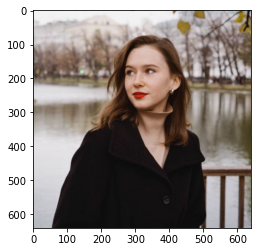

In [28]:
#загружаем и размечаем картинку
img = dlib.load_rgb_image(path)
plt.imshow(img)
 
rect = detector(img) 


In [9]:
#выводим количество лиц на фотографии
print('Количество лиц:',len(rect))

Количество лиц: 1


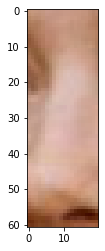

In [17]:
#далее выводим область носа для каждого лица. 
#Координаты лица сохрвнены в векторе rect, должен быть цикл. Далее мы рассмотрим алгоритм только на rect[0], для простоты

rect = rect[0]

sp = predictor(img, rect)
landmarks = np.array([[p.x, p.y] for p in sp.parts()])

nose_bridge_x = []
nose_bridge_y = []
for i in [28,29,30,31,33,34,35]:
        nose_bridge_x.append(landmarks[i][0])
        nose_bridge_y.append(landmarks[i][1])
        
        
### x_min and x_max
x_min = min(nose_bridge_x)
x_max = max(nose_bridge_x)
### ymin (from top eyebrow coordinate),  ymax
y_min = landmarks[20][1]
y_max = landmarks[31][1]
img2 = Image.open(path)
img2 = img2.crop((x_min,y_min,x_max,y_max))
plt.imshow(img2)

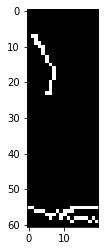

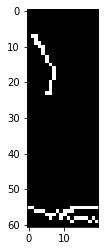

In [10]:
#далее выводим только конутры

img_blur = cv2.GaussianBlur(np.array(img2),(3,3), sigmaX=0, sigmaY=0)
edges = cv2.Canny(image =img_blur, threshold1=100, threshold2=200)
plt.imshow(edges, cmap =plt.get_cmap('gray'))

In [11]:
#тут алгоритм проверяет, есть ли в центре картинки - переносице - пиксели.
edges_center = edges.T[(int(len(edges.T)/2))]
print(edges_center)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255   0   0   0]


#### Предлагается классифицировать фотографию как "очкастую", если в центральной области есть хотя бы один ненулевой пиксель, однако, это сверхчувствительный алгоритм. Ниже попытаемся обучить алгоритм на основе ML лучше определять наличие очков

#### Если у вас есть. nvidea и Windows, то можете использовать fastai по ссылкам ниже

In [ ]:
#Ниже приведены источники:
#https://medium.com/@eyeq/training-on-small-image-datasets-for-classify-people-who-wearing-sunglasses-or-gauze-mask-5283bc3353d6
#https://www.kaggle.com/hortonhearsafoo/image-classifier-with-fastai

In [ ]:
#загружаться будет быстрее обычного, но можно успеть посмотреть это: https://www.youtube.com/watch?v=GQ95z6ywcBY

In [ ]:
pip install fastai

In [ ]:
pip install os

In [ ]:
pip install torch

In [ ]:
pip install pytorch

#### Если видеокарты нет, то нужно использовать tensorflow

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
# заметили, как быстро установилось?)

In [ ]:
# tensorflow поможет нам классифицировать изображения с помощьью нейронных сетей. Матчасть можно почитать здесь:
# https://evileg.com/ru/post/619/#header_Распознавание_изображений_(классификация)

In [ ]:
# а прикладной туториал тут:
# https://habr.com/ru/post/426797/
# его я и буду использовать как основу обучения

#### Заканчиваем ноутбук определением того, сколько площади от всей картинки занимает лицо. Чем больше это значение на аватарке, тем больше вероятность склонности к экстраверсии

 Для этого мы будем использовать тот же алгоритм, который мы писали для определения очков. В прошлый раз мы выводили только область носа, а в этот раз будем выводит области лица и считать их площади

In [13]:
len(landmarks)

68

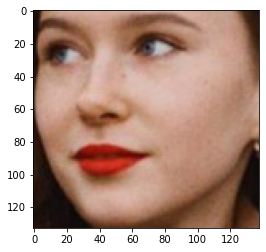

In [20]:
img = dlib.load_rgb_image(path)
plt.imshow(img)
 
rect = detector(img)

#Координаты лица сохрвнены в векторе rect, должен быть цикл. Далее мы рассмотрим алгоритм только на rect[0], для простоты

rect = rect[0]

sp = predictor(img, rect)
landmarks = np.array([[p.x, p.y] for p in sp.parts()])

face_x = []
face_y = []
for i in range(len(landmarks)):
        face_x.append(landmarks[i][0])
        face_y.append(landmarks[i][1])
        
        
### x_min and x_max
x_min = min(face_x)
x_max = max(face_x)
y_min = min(face_y)
y_max = max(face_y)

img2 = Image.open(path)
img2 = img2.crop((x_min,y_min,x_max,y_max))
plt.imshow(img2)

In [32]:
# теперь посчитаем, сколько лицо занимает от всей картинки

width_face, height_face = img2.size
width_pic, height_pic = Image.open(path).size

face_area_percetage = 100 * (width_face * height_face) / (width_pic * height_pic)

print('face area percentage: '+ str(face_area_percetage) + '%')

face area percentage: 4.48095703125%
